   Activation Function  Hidden Layers  Neurons per Layer  \
0             logistic              1                  2   
1             logistic              1                  4   
2             logistic              1                  6   
3             logistic              1                  8   
4             logistic              2                  2   
5             logistic              2                  4   
6             logistic              2                  6   
7             logistic              2                  8   
8             logistic              3                  2   
9             logistic              3                  4   
10            logistic              3                  6   
11            logistic              3                  8   
12            logistic              4                  2   
13            logistic              4                  4   
14            logistic              4                  6   
15            logistic              4   

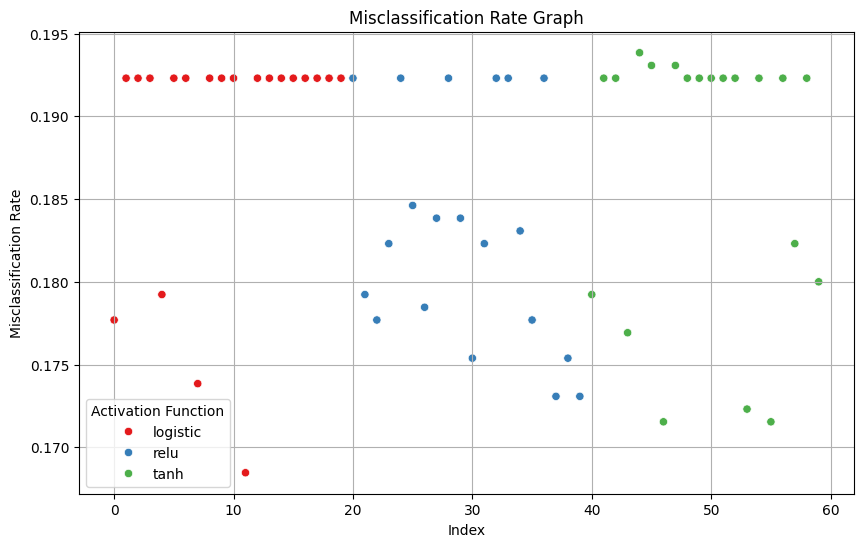

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, SpectralClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, root_mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier, MLPRegressor
import seaborn as sns

dataset3 = pd.read_csv("lab04_dataset_3.csv")

X = dataset3[["alcohol", "citric_acid", "free_sulfur_dioxide", "residual_sugar", "sulphates"]]
y = dataset3["quality_grp"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

activation_functions = ["logistic", "relu", "tanh"]
hidden_layers = [1, 2, 3, 4, 5]
neurons_per_layer = [2, 4, 6, 8]

results = []

for activation_function in activation_functions:
    for hidden_layer in hidden_layers:
        for neuron_per_layer in neurons_per_layer:
            clf = MLPClassifier(hidden_layer_sizes=(neuron_per_layer,) * hidden_layer, activation=activation_function,
                                max_iter=10000, random_state=2023484)
            
            clf.fit(X_train, y_train)
            
            misclassification_rate = 1 - clf.score(X_test, y_test)
            
            results.append({"Activation Function": activation_function,
                            "Hidden Layers": hidden_layer,
                            "Neurons per Layer": neuron_per_layer,
                            "Misclassification Rate": misclassification_rate})

results_df = pd.DataFrame(results)
print(results_df)




plt.figure(figsize=(10, 6))
sns.scatterplot(data=results_df, x=range(len(results_df)), y='Misclassification Rate', hue='Activation Function', palette='Set1')
plt.title('Misclassification Rate Graph')
plt.xlabel('Index')
plt.ylabel('Misclassification Rate')
plt.legend(title="Activation Function")
plt.grid(True)



sorted_results_df = results_df.sort_values(by="Misclassification Rate")

best_model = sorted_results_df.iloc[0]

print("Best Model Parameters:")
print("Activation Function:", best_model["Activation Function"])
print("Hidden Layers:", best_model["Hidden Layers"])
print("Neurons per Layer:", best_model["Neurons per Layer"])
plt.show()

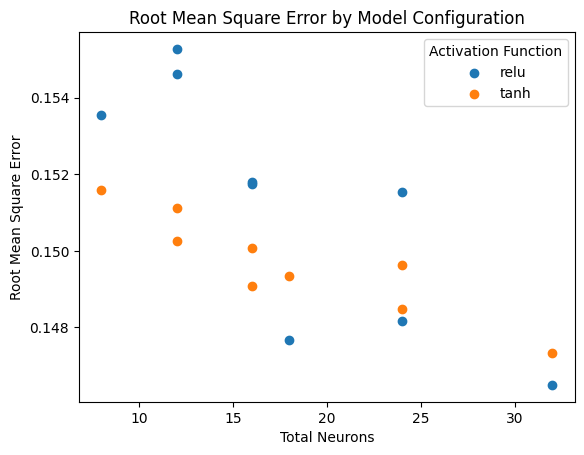

   Activation function  Hidden layers  Neurons per layer  \
0                 relu              2                  4   
1                 relu              2                  6   
2                 relu              2                  8   
3                 relu              3                  4   
4                 relu              3                  6   
5                 relu              3                  8   
6                 relu              4                  4   
7                 relu              4                  6   
8                 relu              4                  8   
9                 tanh              2                  4   
10                tanh              2                  6   
11                tanh              2                  8   
12                tanh              3                  4   
13                tanh              3                  6   
14                tanh              3                  8   
15                tanh              4   

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset for regression
data_path_regression = "lab04_dataset_4.csv"
try:
    data_regression = pd.read_csv(data_path_regression)
except FileNotFoundError:
    print("File not found. Please check the path and try again.")
    exit()

# Select the inputs and the output for regression
X_regression = data_regression[['housing_median_age', 'total_rooms', 'households', 'median_income']]
y_regression = data_regression['median_house_value']

# Normalize the input features (X data)
scaler_X = StandardScaler()
X_regression_scaled = scaler_X.fit_transform(X_regression)

# Normalize the output target (y data) using Min-Max scaling
scaler_y = MinMaxScaler()
y_regression_scaled = scaler_y.fit_transform(y_regression.values.reshape(-1, 1)).flatten()

# Splitting the data into train and test sets for regression
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_regression_scaled, y_regression_scaled, test_size=0.2, random_state=2023484)

# Define the parameters for MLPRegressor
activation_functions_reg = ['relu', 'tanh']
hidden_layers_options_reg = [2, 3, 4]
neurons_per_layer_options_reg = [4, 6, 8]

# List to store results for regression
results_reg = []

# Train models with varying parameters for regression
for activation in activation_functions_reg:
    for layers in hidden_layers_options_reg:
        for neurons in neurons_per_layer_options_reg:
            hidden_layer_sizes = tuple([neurons] * layers)
            mlp_reg = MLPRegressor(activation=activation, hidden_layer_sizes=hidden_layer_sizes, random_state=2023484)
            try:
                mlp_reg.fit(X_train_reg, y_train_reg)
            except ValueError as e:
                print(f"An error occurred: {e}")
                continue
            y_pred_reg = mlp_reg.predict(X_test_reg)
            rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred_reg))
            results_reg.append({
                "Activation function": activation,
                "Hidden layers": layers,
                "Neurons per layer": neurons,
                "Root Mean Square Error": rmse
            })

# Create a DataFrame to hold the regression results
results_df_reg = pd.DataFrame(results_reg)

# Find the model with the lowest Root Mean Square Error
best_model_reg = results_df_reg.loc[results_df_reg['Root Mean Square Error'].idxmin()]

# Plotting the root mean square errors
fig, ax = plt.subplots()
for activation in activation_functions_reg:
    subset = results_df_reg[results_df_reg['Activation function'] == activation]
    ax.scatter(subset['Hidden layers'] * subset['Neurons per layer'], subset['Root Mean Square Error'], label=activation)
ax.set_xlabel('Total Neurons')
ax.set_ylabel('Root Mean Square Error')
ax.set_title('Root Mean Square Error by Model Configuration')
ax.legend(title='Activation Function')
plt.show()

print(results_df_reg)
print("Best Model:", best_model_reg)
